This file creates a heatmap visualizing the dot products between hypervector representations of the first 5 501-mers in a given read.

#### Set Up

In [20]:
from HDHashTable import HDHashTable
import numpy as np
import matplotlib.pyplot as plt
from tabulate import tabulate

In [3]:
read = 'AAAAATGATAGGCCTATTGATTCGAAGTAAGTACGAAAGGGGTCGGTCAATAGCATAGCTCTTTTTTTTTCTCCTTTCGAAGGAAAGGCCTTCGCATTCCTTAATCTGGTAGGGCCGGACGGCTTTGTTTGCCTAGCTTGGCGAATCGCGCCCCTGACCGTTCTCGCGAAGTCTTTGCAACGGCTGGGAAACCTGTCTACGAAGCTAAGCATATTGCCACGCCGACCATCAAATACAGATATCTGGGCCCCTTCTCAAAGATGGAATGGCCCAGCCCAATAAAGGAAGGTTAACGTACGCGATGCCTTCCATTTGTACGAATCGCGAACATACCACGCACGACCGGACGTAGAGCAAAATTCACTGGCAGACCGAGTCGGGCGCAGGTGCCGGATCCTCAAAGTAAAGTATCCGATCAGCCTAGTGTACCAACCCACGTGGTACGACGGGGCACTCAAAGACCTGGCGAATGAGGGGCCCCACCCCCACCAAGAGCAGCGCTTATGTCATATGGGAACTCTTGGCTGGAAACAATCCTTATGGTTTTGATATCCGGTTAGAATAATAAGAAAGAATCAAAGTCCAAGTTGGTTGGTGAGCCTAGTGATAGGAGACTATCTAGCTTGGTTCGGAGAGCACTTGTTGGCGTTTAAGATTAGTTTTTTGCTAAATGTTACGGCCTAAATGCTGAACTATTGACCCCTACTTGTTCGGATGGGTGTTTCACCCCAAAGTGTTCCCGGACTGCATGCATACATCCGTAAGTAACTTAGTGCAACATGGCAAATTTCATTGAGAGGAATCAGCAAAGAAAAGAAATCTTCTCCGGGTGACTGGATCGCCCCGGAACACACAAGAATCCTTAGAATGGGATTCCAACTCAGCACCTTTTTGTTTTGAGATTTTGAGAAGAGTTGCTCAACAATTGGAGAGTACGATGAAAGTTGTAAGCTGTGTTCGGGGGGGAGTTATTGTCTATCGTTGTCCTCTATGGTAGAAACCCCGTCGGGGAGGCCTGAGAGGCGGTGGTTTACCCTGTGGCGGATGTCAGCGGTTCGAGTCCGCTTATCTCACCAGCCCGTGAACTTAGCGGATACTATGATAGCACCGAATTTTGCCAATTCGTCAGTTCGATCTATGATTTCGCATTCATGGACGTTGATAAGATCCTTCCATTTAGTAGTAGCACCTTAAGATGGCATAGCCTTAACGTTAATGGCGAGGTTCAAAAGAGGAAAGGCTTGCTTTATTCAATACCTCCCTTTATCTATGTAGTGTCTCTTCATTTTCTTGGTGCTTAATGTTGACATTTCAGCTAATGGAGGAAGATTGAGAGTGAAACATTTAGGTACGACAAAAGGAAAAAGGAAACCCTTATTTATAAGTAGCTTTGCACAGCAATTGGATCTGGTAAGGTCTAAGGTATAACACAAAGTACCTCTTGAGCGACCTAGGTTCACGCTGGTACTCCTTTCGAAGAAAAATTGTCGTTGGAAAGAGCTTCTTGCATACGATCTCCTCCGGTTGATATTGATGGTATTCGTGATGAACCTCTTTCGGAAGCGAAGGAATCCAAGCCAAGAAAGAACTACCGGCCCTGCTGACTTCATATATTCAGTGCTTGGCGAACGTTGCACACTCCATCACCAATTCCCTTTCATTTCCACAGGCTCCTTCTTTTGGGAGCAACTTTTTGTGTGCAATTAGGTAAAATTTCTCTAACTCTATAACTTGGCAACTGATCAAAAGCTATTCCTCTTAGCCCTAGTAGCCCTAGCTATCTAATGCATACTTTCCAACGGGCCCCGGCCTGGCAAATCACTGGCACATGACTGGAAATTGAGCTTAGTTAGAGAGCATTAATTACATCACAAATTCCACCTAGGGATTCCTCTATAAAAAAGATTACTCTACTGAACATCTGCAACACATTCCACAGCTTTAGTGCACTTTGGTCTCGAAACTGTTGACTAGGCATTGTCTCGATGAACTATTGATCGCAGGACTACTTGTTGTGAATTCACAATTGAATCGCTTCTAGTATGAGAATTTGGTTTTTCTCTCACTTTCCGGTTGTAATAGAAGGTTCATTGGCTCGTATCCTGGTTGAGAAGAAGCAGTTTTCAAGCTTGACTTGATCTTGGTCAAGAAGACAATAGGGTAGGGTTTGAACTCGCTTGTTTCGGAGCCCAAGGATTCTACTCACTCGCTACACGCTTGCTGGTTTCGAACTAATGTCGGATCACTCGTGGTTTTCTTTTTTCGGGTTTATCTCCTCACATGTTGGAGCAACAGGTAGATTTACATATCTGATACCTCTGCTCCTTCCCTTGGGGCTAGTACTCCAACTGAAACTGAAACAGGTGAACTTTCAGCAGCATCTCCTTCAACTGTAGCTCTTCCTGGAACAGCATCCCCAGGGACCGGTTTAAACTGCATTTGATCGCTTCAGGCTTGATATATGGTCTCCAAACCGATAAAAATCGTCATAATGATTTGTGCATCATCAAAACGAGAAGAGGAAGCTCGGGATTCGCGGTTTTCATACCGCTGGTCACGCCTACCATCACGCCTGAAATCTCGATCTCGGCGGAAGGTTGGCTACGGCTGGCTTGGTCGAGCAGCCATTAAACTAGCTCCCAAAAAGAGAGAAAGAGATTCGGATAGGATGATAGTTCTCCCCAAGGAAGAAGACAGCTCAAACCACCCCTAGCTTCTGGCTCTTCTAAGTACTTCCTCCTTCCCTGAAAGGTAGGCATGCGGACTAGAGCAGTTAGGTCAGCTCGCAAGGCTCATAACCTTGGGGTTACGGGTTCGATTCCTACTACCCGCTCCATATTCCTTCTTTATGATATATGTATCATCCATTTGTATATGGTATATGGATTGATTTTTCTTTCCTAAAAGAGTTTCGGTCTAACAGTTTTTTCTTTTTTCTCTTAGAGAGTCCTTCTGAACTCGTCATGAATTGGATTTGAACCAATATCTCATTGAGACTTCTCCTTTTAGTCGATCATGACGGGGGGATTCCTACTACAGGATCCCGGCGCCCCCTCCCACCTTTTACATGGAATATTTGCGCCAGCCCTACCCATCAAATGGAATCCAATCCAGTAGAGTAGTAAGGTAAGGTGAGAAGCCGGGAAAATAGATCGGATCAACCGGAAAATCATCTTAAAAAGAATCGCATTTGACAGTTTCTGCCAGGACGATTCCATCAAATAAATAAAAAAAAAGTTAAGAGGAAAACGCATAACCAGAAGAAAAAAGATATCGTGATGTAAAATGATCATGGGGACACATTGTTTTTAGGACCGACAATTTCCTGCACAGTGCCTGTAGTGATTTCAGAATTCGGCAACTTCGCCTACTAAAAGATCAGTTACAAGAGCACAATGCTTTTTGTGGCTTCCTGCTCGTCAGAGAAACCACGCTGCCGGGGTGATCCAGTTACCCTGAGAAGTTCTCTTTGTCTTCGAGCTTTCATTCCTCAATCCACTTATTCGTTCCCTTCTTTCATATACCCTCCCCACCAATAGATAGAGACAAATGGGAATAACCGAACCACGTCTACAAAATGCCAGTACCATGCAGCTGCTTCAAAGCCAACGTGATGCTTACTTGGTCAGATGACCAAGATATTGGCGAATACCACATACGATCAAGAAAAGAGTACCTATAATCACATGAAAACCATGAAAGCCAGTTGCTAAGAAAAAGGTAGAACCATAAATACTATCCGAAATAGTGGAGGGTGCTTGGTAATATTCCATTCCTTGAAAGCCAGTGGATACTAGAGCCAGTGAAACGGTTGCTACTAAAGCGTAAACTGCTCGTTTTTCCTTCCCCGCGAGTATAGCATGATGAGCCAAGTTACGGCAGCTCCGGATGAAGGGAGAATAGGGGTATTAAGAAGAGGGATTTCCCAAGGATCTAAGACCCCCAATCCCTTTTGGGGGCCAAATACCTCCGATCTCTACCGTAGGTGCCAAAGAAGAATGAGAAGAAGCCCAAAAAAAAGCAAAAAGGAACATAACCTCCGAGACTATGAAGAGAATAGAACCATATCGAGGTCCTAATTGTACAGCTTTTGTATGATGCCCTTCCAACGTGGATTCACGTAGAACATCCCGCCACCATACGAACATGGTATAAAGGAGAAATATTAGGCCCCAAACTGAGAAGTGTTGCACCCCCTTGAAATGAGTGCATGTACATCACACCTCCTACAGTGGTTGCCAAAGCTCCGAGTGAACCCGAAATAGGCCATGGACTTGGATCTACCAAATGATAAGAATGCCTCTGAGATTCAATCATAAACCACTTTGCCCCGGTTGTATGTAAACCCCCCTTCACCCCCATCCCCCTAAAGTGGTAAAGAAGGAGGCTCTTCTTTGTCTCATTAGGACAAACAAATAGGAAGGGATAGTTCTTTCATTGCATTGATAGAAGTGAGACTATCAAAAGATCTCTCTATTTTTTAGAGAAAAGAGTTGGCGTGGGTTCTACCAACGAAACGAAGAAGTTTTTGATTGGTCTTTTTCATGCGGAAAGATAGTATGTAAGAAAAAGAAGAACTAGCGTCTCTTTTTCTTATCTTCTTTTTTCCAGAAATTTCTGGAACCCCTCTTTATTGAGACGCCTTTTTAGAAATGGAATAGCCATCATCTTCCATTTCCGAATCCTGGGGGGAGGCAGGATTCTTTTTACAAATCCCACAAGTAATCAAATGAAGAACTTCAATTGCAATCCGTTTCAACATCGGGTGGGTAACAACATCTTTTCAGCTCTGCTCACAAAACAAAAGAGGAAAGGAAGACTGATCTTGGACGTCGGCGTTGGTTTTTCCAACGAAAAACAAGAACATTCGAACACGAACACGAACACGAACTTCCATGACAAGACAAAATGCTAGCTTCCCAGTACAGTAACGCATACACTTCCGCGTTTGTCCCATTGACGAAGGGCCAATGAGACTATTCTACGCGTTTTCTGAGAAGCAACACTCACCTACATTTGACCTGACTTTGATAGTCAAACGATGTAGAGGAACGGGCGTACCTGAATCACGTTTCCTTGACCTCACTTCGTTTCTCATCTCATCAACCACTACGATAATCTTCTAGGATAGAGGGAAGGGGCGAGACCTTGATTTTAACCTATTGAGACGAGGTAGACCATTATGATATATACAGGTGAGTCATTGATTTAGTTACACACCCTCTTCTCTGACAAGAGAGAGTCTTCGGCAGCAGCAGTACTTTAGTACGATCGAACAACGGGGAGATTTCTCTCTTGCTTGGGTTCCGTACGGTCTAACGAAGCAAGCGTGATGCTTATCTGATGTCAGGTAAAATTCTTACTATGACATTGAGAACAGGAGGTGGAAATAGTCAGAGTGGGAATAAGCATAGCATAATTCTAGAAAATCCATTTTATCGAAGTAGTTGGATCATATCTTCACTTTCCTATCTAGCTTTGGTAGCAGGAGTACGTGTCCAACGGCTGGTAAGACCCCGTCTTTTATGTGAAAAGCGAAGAAGGAAAGCATGCTCAAAGAAGGAAAGCTCAAGGTCTAGCTGAAATTCCAGAGCCACTGCGAGCACTAAGTACAAAGCAAGACATACAGGTCCTCATCTGATCCTTATGGGAAAAGTAGCCTGGGGATTGATTAAACACTCGGGAAATATTCGAATAAGTTATTTATTCATGTAGCTATATAATAAGTAATTTCTGTAGATAAGTGATTTATTTTAGAGTAGCAGGAGAAGAAACTAGATAGTAGCTGGAGAAGAAAGATACCTCATATCTTCGGCAAACATGATCGCTATGGATAGACATGGATAAAGCATCTCTAACGATCTTATAGTAAGTAATATCGTCGACTGGATAGAGTAAAGGAAAGGTAATTCTTCGACTGGATGGAAATTCGTGTTGAAACTTCAAGGCTGCCGCTTGACCTTACTGCTATAACCGCTTAGCGCCTGCCCACAGCCTGCTATACAGCCCTACTGTTTGACTACTTTGGCTTGCCCTACTGTAGTGTATTACATATAATATTCCCGCCCTGTTGGCTTGCCCAACTACGGCAGGCTTGACCTACTAGAGTCTCGCTCGAGAAAAGGTTGCTAAAGGTCGTTGTATGCTCTAGTGTGCTAAGTTGGTGATCTGCCTTCCAACTAATGGGTTGTGGAGTGCTAGGTACGCTAAACAAGAAAATGCAATTCCGTTGTTTAGCATCTAGTTGAGTGGGTGCTTGCCAATGGATGGTTCTTCTTTCCCTTCCGATACATAAAAACGATTTCTTTGCCTTCTCACTAGTGGTCTCAATCCCTTGACTCGTATCTCATATTAGGTGCCCTACTTCCTTTTTATATCTAGGAACAAGCGTCGGAGTCAATATCCAAGTAGCAGCCGGAAGCTGTCCAGCCGAAAGACAGATCTGACAAAGCCGGTGAGGGGGGCAAGTGTTCTTCGGACTCACTTCTCAATCTGAGTGCCAAGATGCGCCTGGAGCATAGCGCTGGGGGTGCGAGAACGAGTAGTTCTGGTCCCACCCAGAAGAGTGCACTGATAGCCTATCTATCAATCTTCTCCAGCCAATGACATAAGATAGGGAATCTTTCTGATTGGTCTAATTGAGAGGAAAGACAGCGTAAGTGTTCTCGATCCTCACAACAGACTTGGAAAGAGATGGATTACTTAGTCCAGTGTGATGTGGTCAAGTGCGGGCAGACCGCGTGAACCACTGTCTCTTGTTAAAGAGCGCTGTAGAACGCTACTGGGATAAAGGGGGATGACCTTATCCCTCTTATCTCCTATCTCCGGAAAACGCCCATAATTGCAAAAAAGGGGCAATGATTGTTCATTGCGTTGGTATTCCTAGAGGATTTCCTCTGTCCCCTATCTTGATGAACCAGAAGTGAGAAGGGGTAGGTGAATTAAGGGGTTCTTATGTGTCGCCATCAATTGGATCTATTCTACCCAGTAGACCTTTGCAAAGAAGAAGAAATGAGGATCTACTAGCCGATCACGAAATAAGCTCACTCGTGGTCCCTACTGCTTATGGCGACAGTGATCGAATCAGTTCAACTGGTAGATGAAATGGGAATTTATAATGGAAGCGCACGACGGGGAAGCAAAGACGGGGGCGAAGGGATTACGGACCGGGCTTTCCGATACGCTGGATTTGATACCTTCTGATATTGCACTAGAAATGAATAGAGGAGGAAGAAGAGGCTAGGTAGGCTGTAGTAGCGCATGCTGGAAAGCTAGTCAAGGTTGTTCGACAAAGCACATTAGCAAAGGTAGTTATTTCAGTTAACTTTATCTGGTTTCAATCCTTCCGTTACGAGATATCCTTTCGTACAACGGTAAGGTTTTCCTCGGCTACCCCTATGCCCATATGGGGCAAACAAAACAACAACGGTTTCCTTTTACGGCACTGCGAAATCCGCGAATACCAGCTACTATACCCTTTTTAAAAATACTAGCTTTCCTTTTGCCTCCCCTTCACGGGTAAGAATATTTTCTATTCCCAGGACTAGTACGCGTACGCTATTGATATTCCTTGCGCAAGAGCTATTCCTATCCTTTCATCCAAAGCTTCCTGTCGGTTCCCGGATTCAAAGCATCGGCAAAGAACATTCTATAGTTTGATTCGGATTCGTCTGCATCTGGGGCCGAAGAGAAAGAGGTTTTTTCCTTTGCTTCGGGTTCGGTACACGGCTAATCCCTACTCCTTATTGGGCAAGGGAACTACAGCGGCATGATATCCGTAGCGATTCCTACTCCTAGCACTAGCGATAAACAAATCTAATTAAAAAGAAATCCTAATCTCCAAAGCCCGGCTTCCCTAAAAACCAATACGAGTACGAGCGCTAGCCCTTTTGGGAACAACAACGGCTTCCTATTGAAAATCCAGCTAGTTCGAATAGCCGAGGACAGGATTGATCATTTTATTTATATATATTGGGAAAGTAGTAAATTGGCATTTTCCCTAAGGTCACCAATTGCAAAAACAGTTAGTTTCATATATAGGCCAAATCAATGCAATGTGCGACGGGCGCCTAGCTTCGGGTTAAGCACTAGGGCAGTTCGGGTCTTCCGTGAAGAGATTTAGCTGCTCCTCTCCTATTGGAGGTGCGGTTCCTTATCGTTCAAATCAATCAAAAGATCAGGGAATGGAATATGCTTCCTACGCTAGAGAAATGCTATTCCTAGACCTATCGCTATCCCCTTTAGGAGAGCTATCCCTTTTACGAGCTAGAGCGTAGCGATTCGTACTCCTTTTTGGGGAAGGTAAATCGTAAAAAGGTCCAATCCTCCAGGGCAAAGGTATCTTTTCTTTCCGAAAGAACAATCCTAATCGCATATCCAAACCAAAGAAGATGATATTTATTTGAGAAAGCGCATTCTATTATCGGTATTGCGACACTGCTCCTATCCCTAACGCTTGCTCTGTTGACTTCATTCCTTGTCGGTGTTGCGAGCCCCTACTAATAATCGAAAGGACTGAGGCAACTTTACTTGTCCCTTTCTAGTAGGATTTGTTGTCTTCGTGGAAAAGTCAAATAAAGGCGCGCAGCGGAAGCCCCAAGTATATAAGCTGGGAAAGTTGCATATTATATATTGAAGTAAGGGCTTGTCAATCCTTCATAGCCTTCAAAAATTAGTTGTTTTGGAAGGGCAAATTGCTTAAAAAAATAGAATTTCGGAATAAACAAGGATCAAGTTTGATCATGTGGCTGTACTGTGCTTATCGTTAAGCTTTGAGAGGTCAGTTAGTAGTTCCTGGCAAGAAAAGCAATCTACTTCTTTTCTACATTCCCCCTTTTGCTACGGGAACGAATAGTTAGCTCTGTTTGGACAGCAGGAACGAAACAACTAGTTGGATAGTGCTAGTCTTTTCCAGCTATCTATTTCTTTCTTTCAACGTGGATCAACCAGGAATGCCTAGCTCACTTACTTCTTTGTGGCTTTCGCCTAGCTCTCCTTTCTTCCATATGGGCTACCTACTTATGGACTAGTAGTTTGTAGGCTAAGTGAACGGGTAGCTACTGGTTGATAAGGAATTAGTTCCAGCTATCGTAGAAAGAATGGGGCAGTAAATTTATATTAAAGCATGGGAAAGTACATAGGTATAATGCATGGGGCCCTTACGACATATATGAGCAAGTGCTCGTCAAGAATACAGTACTACCAGTCTTGTCCATGGAACGATACGCAGGTGTTGATTCCTTTATTGTTCTCTATTACCTAGCCATACACACTCCTTTCTCCTATTACTCGCTAAACACACTCCTTTCTTTCCTATGCAAGTATCATTCCAGATGCATGGATTAGCATACATATAAGAAATCTCTTACTTAAATACTGAGATTGCCCTTCTTCGTATATCGATTTGGGAAGTGTTCCAGAACTAAATGAATACTCCTGCTGCTAGTAGGTGGAAAACAGGGTCAATTGTGGTTATGTTTGATCCATCTGCTTCGGGTGCTTTTGCTAATGAATCTTTTCCTTCTTCGTTCTGATACGACCCATGCCATGGATATGATCAATGTAAAGATTTGATTTTCTAGTTGTATACCACATCATTAGATGAACGATATGAGGCAGTTGCCAATTGCACTCTTGTTGCTTGTAAAAGTTCATTCAAATCGAGAGTTTTAACGATTGGGACATAGCCGAGATACGCTAAGGTTGAGGCAAGCTTCCTGAACCTTTTCCTTCACACAGTGATGAGGTAGTCGAATTCCTATATGTCGATAACTTGTGTAAAAGCTCTTGTAGAAGTAAGAGTCCCTCTGAGATCTTTCGTTAGCCCGAACGAACACTCTTCCTCTGAGATAGAATCAAATAAGTGACAAATGAATGGTAACACATTGGTACCTATCCGTGGTCGGGAAATGCTTTGTGCCCTGTGTCCTTGCTTTGATCTGAATTGACGGATGGTAGCTACTACCCGGCTTTCCCTCGAGGAACTAATCCACCGAGAGTCGTGCGTTCCCGTGATTCCAATGATTACTACTGCCCCTCCTCTATCCAATACCGAGAAAGAGTTCGCCTTTGAATTGATTGCAAAATGGTAGCGCGGCTGCTAGCACAGGCAAGTGTGAGCCGGAGAAGCCAAGAACTTACCTAACCCTTGAGTACCTCCTTTCCGGATGAATGAGCAAATCAATCACGACGTGGGGAAGGCCTACCTCCATCAATAAAATGTAACACTTTTCTGGAAGCTACGACTACAAAATCTGGTCCAGCATACAACTAGCCTGCACCCGACACCCAACTTATCTGAATCTCCTTGTCCATATCATTCCTACTGACGTGCTTTGGAAAACCCTAGTCAGAGTGAGGCATATTCCTAATCAGGGGTTTATCCTTGCTAACCGAGGCATATTCCTTTTCGATCGATAGATCATCGATCTTCTGCGTCTCTATTTCTTGTTTCCACTGGCAGGAGGGGATGAAGAGTAGAGGTGAGGTCCCTGGACAGCAATTGGATATGCTTAGCACCCTTTAGCGCTCTCTGGCTCGCTACAACACTTCCTCCCCCTTCGTCGAGTTGCTTTCATGCCCTCTGCTTGATTTCCTACTTCCTTTCAATGAGGCTTCATAGCCGTAGTTTACCAGCCCCCAATGTGAAAAGTTGGGCAAGCCTTATTTAGTTAGATAAGGCCTGGCGCTTTGAAGTAGTAGTTAAGGCGAGAAAAGGAAAAGCTTCCTACTGAACTGAGCCAATCTCTCTCTCCTTTTGTCTAGCTTAGCCGGTTCAGATTGCAGCTTCCTATTTTCCTATTATTGTTTCTCTTCCATCGAGAAGCCATTCTTCATAAGTCAATAAACTGGGAGCCAGTGTCATTAAGTGGCCTATCAGAATACAGGTAGCAACCATTACGCCACTTGGCTGATAAAATCCTGCTCATAAGCCAGTTCTGTGTGCCGAGTACAGCCGTTGCCTCAGGGGAAGCGAACAAAGTCATTGGAATAGTTTATTTATAGGGGTGGGTCCTTCTCTTATCATTTCAAGATCGATCATCTCGAGTCTCGGGCTGAATAACCTACTCTTCCTCCGATCTGTAAAGATGAATTTCCATACCTTGTTCTTATATGAGGTTTCATGAGTACGATCTAGACTATACTTATTTTCTCAGGTTTTTTTCGCATAGCGAGTAGAGGAATAGTTTCTAGTTTTGGAACCACCTGAACAGGAATCGCTGATCCACCTTCACTTGTTTCTCTGGCTTCGATTCTTTTATTGTATAGTATAGTGGACGACTTAGGAGCTTTAAAGCCGCACTGACCCTCGTGAAGAGCTGGGGCCCACCTACTATAGATTATAGATGGGCCTCGTTCCTTTATAATACGATCTAGCTTGTGAATAAAAAATCCATCATCCTCAAATTATGATAACTGCCTTCTAGCCGCAGCCGGAGCTACTTCTAATCCGGAATCCAAAGGAGTCGAGCTTTTCGTACTACCATCGCCCGGGCATCGCTTTCTTCCCACTGCTTTCGTCCAGTTTTATTGCTCCTCCTCTCAACTTATTGTTCTTGTGAATACCGTACGTAGTAGTTCTTGTGAATATCAATCTAGGCGTAGGGCTAGGCTGGCTTGCAAGATTCGCTTCGTGCCGTTGGCAAAAACACTGGTATATGCTTCGCCCTTCTCTTCCTTGAAGTTTAAGGGGAGAAAGATACCGTCTTCTAAACTGAGGAGAGTTATGTATCGCCCTAGCTTATCTGCTGACCTTGTTTTACGAATCTGACTTCACCCCGAAAGAACAAAACAATAAGAAGTGTCAATGGGGTTTGGTTTCTGACCGCACTTCTCTACAGGCATCCCATCCGTCCTCTTCCTCCAGCAGCTCAAGGTACGCACAGGAAACCACATCTTGAACCACGGAATTCGCCGTGATAGGTTTCTTCTTCCGCTCGGTACTCATCTACCTAATCTTCTAGAAGCTTGTGCTTTTATAAGGGAAAACCAACATCACGTAAGATGAGGCCTATCCACGACTGTAACGGGCAAGTGCTAATGCCATAGAGCGGTATTCATCCTCAGAGCTTGACCTGCATACCTTTTTCCAGGTGCAAGAACAAGACCAGCTGAATGCGAGATTGCTAAAAATGACTCGATAGAATGCTAATTGAGGCCTATCCTTCCCGAAAGCGTCGGCTAGTTCTATTCTATTCTATTCTATTCTATTCTAACTTGACTGACTTCCTCTAAAAGAAGAGTTAACACGGTCGAAGCTCAAACCCTTTCTGCTTTGACCGCTTGTATCTCCATGGTTTTTCCAATGCGGATAAAACAACTATCGCTTGAGGTAAAAGAGAATGCCATAACTTCACCATTCTCGAATCCATCCTTGCCTCGCTCTAACAACTTTATCTGGAGATAGTCCTACTTTTCTTTAATTCTGGAAGATACCGACGAAGATTACCGACATGGGAACTGAACTTCACTTTTCTATACGATAATAGCGATTTTCTTTTTATGATCAACAGGTCTAGGTACTCTCGCTTGATTCATTCCACTAGGTTCTACGAACTTAGGAACTCCGAACTCATGCTTTATTGAATTCCGTAGAACAAACACAAACTACTTTAAGTGCGGGGCTGCCTCGAGAATAGCCAACTTCTCATTCAAAGTATGCTGTTTCTATTTTATCTAGCCCAAAAAGAGCTTTTTCAAAGCATTACTCTTTTCTTATGAGCTCCATGGGTCCGATATCCACAAGCGAACCCATTTTTATTACTTTCTTATCAACTAGACCCTTCGGGGACGCCAGTGCCTTTTTCAAAATCCGATTTAGCGGTTTCAAGTTCGGAAGGTGGATCTGACGAAACAACTTTCAGTGCCTTTTCGGTTCGGTTCTTTTGGTTCAAAACTAGCGCCAATCGGATAAAGAATTCGATGCCCCTGGATTTACGGATGGACCTACTTATCATTCCAAGTAAGGGGGAAGCAAAAGTTCAGAGATGGGGATGCCGATCTGAAACCAGCTATCTTTCCACTTCTATCGCTTCCTAATAGGGCTGGGTTGTGGGATGAATAATCGTATCCCCCTGAGGTTTCAAAGCTCTTTAACAGAGCTGTACAAAGGAAGTCTGCACCTTCCCACTTATCCGGACAAGGCAACAACTGCTTTTCGTGCTGACCCAGAGGAGCATGCACGGAGTCGACCGGACCAGAACCGCTTTCTTTTCCGGCCGAAGTACCGCTTTAAGAATACAGTAGTGGAAGCCCTGTGAAGACTTCTTCTCGATCAAAACTCGTAGAGAAATCAGAACAGTTGAAGGAAGGGGACACCCCTGATAATTGAATTCACTTTATTTTCTTCCGAAAAGGGTGAGAGAAATTTCGAATCAACTCTTATCTTGCCGAAGGAGTTTTTCCACCCACTTTCCCGGTTGACTGAGCAATAAGGAAACGTTTCACTGGACAGCACCTAGACCCGCAACTAGTAGCGAGCTTCCATTCGTATCTGGTGGTAGCCTGCGCGCAA'

#### Generate Heatmap

In [5]:
k = 501
D = 10000

In [6]:
# Get first 5 k-mers of read
kmers = []
for i in range(5):
  kmers.append(read[i:i+k])

In [8]:
# Convert k-mers to encoded hypervectors
hash_table = HDHashTable(k=k, D=D)
for i in range(len(kmers)):
  kmers[i] = hash_table.encode(kmers[i])

In [10]:
# Calculate dot products between each pair of hypervectors
dot_prods = np.zeros((len(kmers), len(kmers)))
for i in range(len(kmers)):
  for j in range(len(kmers)):
    dot_prods[i, j] = np.dot(kmers[i], kmers[j])

In [26]:
print(tabulate(dot_prods, tablefmt='simple_grid'))

┌───────┬───────┬───────┬───────┬───────┐
│ 10000 │    20 │   -84 │   -52 │   -24 │
├───────┼───────┼───────┼───────┼───────┤
│    20 │ 10000 │    20 │   100 │   -52 │
├───────┼───────┼───────┼───────┼───────┤
│   -84 │    20 │ 10000 │   140 │   100 │
├───────┼───────┼───────┼───────┼───────┤
│   -52 │   100 │   140 │ 10000 │    20 │
├───────┼───────┼───────┼───────┼───────┤
│   -24 │   -52 │   100 │    20 │ 10000 │
└───────┴───────┴───────┴───────┴───────┘


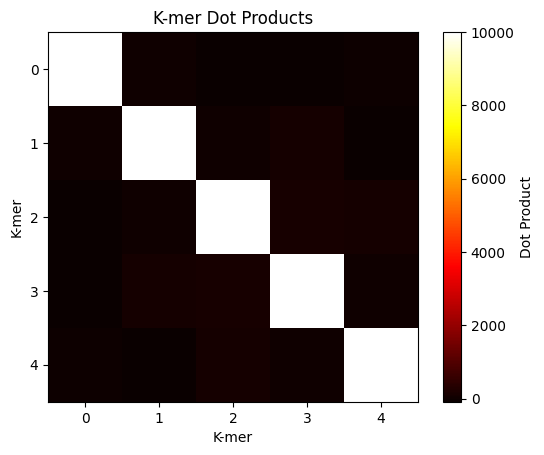

In [27]:
# Generate heatmap
plt.imshow(dot_prods, cmap='hot', interpolation='nearest')
plt.title('K-mer Dot Products')
plt.colorbar(label='Dot Product')
plt.xticks(range(len(kmers)))
plt.yticks(range(len(kmers)))
plt.xlabel('K-mer')
plt.ylabel('K-mer')
plt.show()